**Breaking The Ice(berg): Would you Survive the Titanic?**

*Introduction:*  
Ever wondered if you would survive being on the Titanic at the time of sinking? Well, our project will answer that exact question! The Titanic, which was also known as the “Unsinkable Ship”, was originally meant to sail across the Atlantic, but sank before it could complete its first journey. The sinking of the infamous ship is a huge part of human history and has influenced pop culture—despite it sinking over one hundred years ago. Using the dataset from this link, we plan to classify different passengers based on the following factors: name, sex, age, ticket, cabin. With these factors, we will be able to predict whether a specific passenger would survive the sinking of the Titanic. The dataset itself documents all the known passengers on the ship, their information, along with whether or not they were fortunate enough to survive the event. 

*Methods*  
For each of the passengers in the test set, we will produce 0 or 1, or true or false values for the variable. We will follow the concept of classification for this project. The columns which we plan to classify are name, sex, age, ticket, and cabin. We plan to use classification in order to determine whether a person with certain factors (decided by us) would survive the sinking of the Titanic based on the dataset given. One way of visualizing the results of this project could be by using a bar graph. In this, we can plot four types of bar graphs that represent: 

    1) the percentages of survived males and survived females
    2) the percentages of survived (rich) and survived (poor) 
    3) the percentages of survived people under age of 25 and survived over the age of 25
    4) the percentages of people who survived and did not survive 

*Expected Outcomes and significance*  
We expect to see that individuals with a higher status (e.g. social class) based on the time period have a higher chance of surviving the Titanic. We also expect to see women and those of younger age having a higher chance of survival. These results could not only help those understand the politics and class ideologies on the Titanic but also the societal norms at the time of the sinking. This can help historians in future generations understand the class, gender and age differences at the time in North America. This could lead to more in depth studies revolving around how we as humans prioritize some lives over others and the reason behind that. It can also lead to more questions and studies about oppression and discrimination of lower class citizens. 


In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

Warning message:
“replacing previous import ‘lifecycle::last_warnings’ by ‘rlang::last_warnings’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_unnamed’ by ‘rlang::check_dots_unnamed’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_used’ by ‘rlang::check_dots_used’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_empty’ by ‘rlang::check_dots_empty’ when loading ‘tibble’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflict

In [2]:
titanic_data <- read.csv("https://raw.githubusercontent.com/rpan01/DSCI-Group-Project/main/train.csv") %>%
   mutate(Sex = as_factor(Sex)) %>%
   mutate(Survived = recode(Survived, "0"="No", "1"="Yes"))
head(titanic_data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<chr>,<int>,<chr>,<fct>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,No,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,Yes,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,No,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,No,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [3]:
set.seed(1111)

titanic_split <- initial_split(titanic_data, prop = 0.75, strata = Survived)  
titanic_train <- training(titanic_split)   
titanic_test <- testing(titanic_split)

head(titanic_train)
#titanic_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<chr>,<int>,<chr>,<fct>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,No,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
4,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
6,6,No,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,7,No,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,8,No,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S


<Add table here>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 136 rows containing non-finite values (stat_bin).”


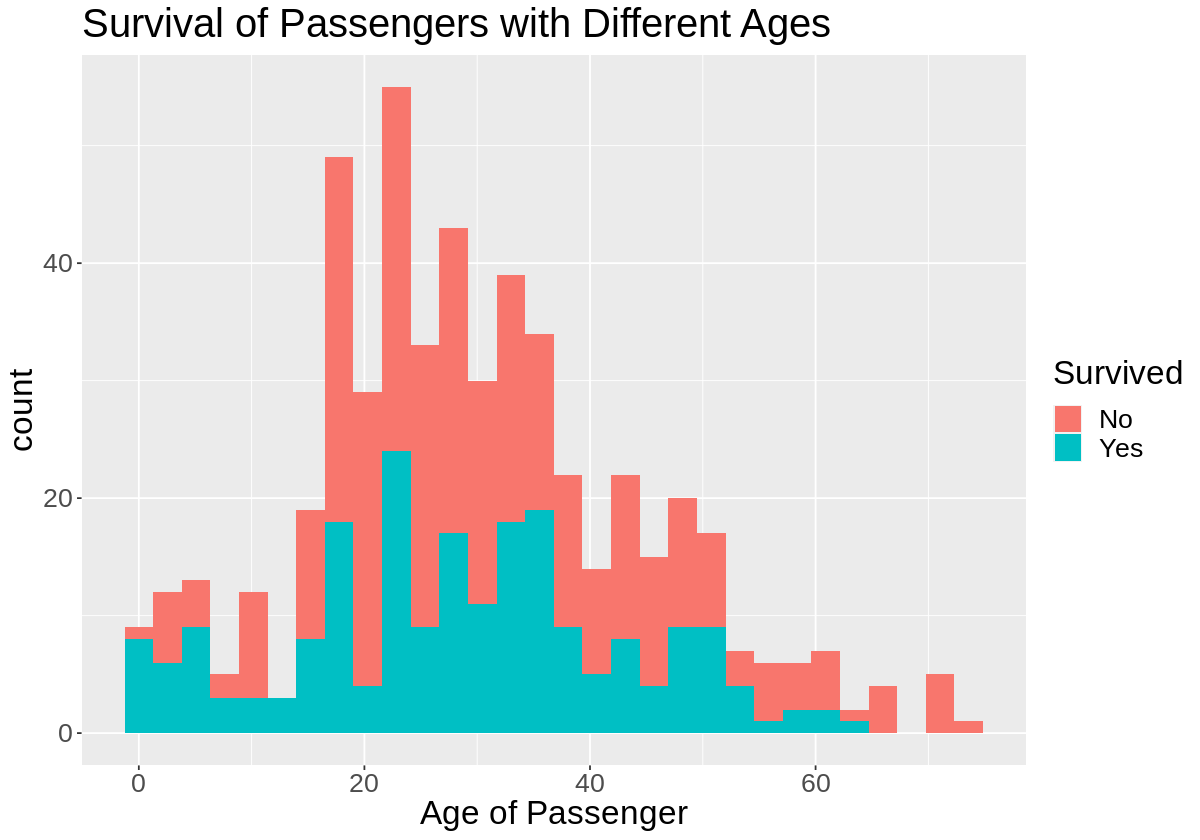

In [4]:
options(repr.plot.width = 10, repr.plot.height = 7)
titanic_plot <- titanic_train %>%
  ggplot(aes(x = Age, fill = Survived)) +
  geom_histogram() +
  labs(x = "Age of Passenger", colour = "Survived") +
  ggtitle("Survival of Passengers with Different Ages") +
  theme(text=element_text(size=20))

titanic_plot